<a href="https://colab.research.google.com/github/CynieC/Bank-Marketing-Analysis/blob/main/Bankmarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRODUCTION



*   Banks are constantly analysing data to understand their ideal customers
*   Customer personalty tests help banks to have a clear visual of who their customers are as well as their behaviors

*   This project will analyse a bank dataset to showcase their customers and whether they are likely to deposit with them.

*   The dataset has been provided by Kaggle, you can get it [Here](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset).










#DATA CLEANING

In [3]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read the dataset
banking_data = pd.read_csv('/content/drive/MyDrive/bankmarkting.csv')

In [6]:
#get top 5 items
banking_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
#get bottom 5 items
banking_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [8]:
#ientify the columns in dataset
banking_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
#describe the data
banking_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
#get information about the banking dataframe
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
#check for the datatypes
banking_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [12]:
#check for rows and columns
banking_data.shape

(11162, 17)

In [13]:
#check for missing values
banking_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

It seems like the dataset has no null values

In [14]:
#check for unique values
banking_data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [15]:
#converted unknown values in education column to Nan
banking_data["education"]=banking_data["education"].replace("unknown",value="Nan")

In [16]:
#converted Nan values to No Education in ducation column dor easy visualization
banking_data["education"]=banking_data["education"].replace("Nan",value="No education")

In [17]:
banking_data.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [18]:
#check if we have null values in the dataframe
banking_data['education'].isnull().values.any()

False

In [19]:
#replace unknown values with unemployed
banking_data["job"]=banking_data["job"].replace("unknown",value="unemployed")

In [20]:
#check youngest customer
banking_data['age'].min()

18

In [21]:
#check oldest customer
banking_data['age'].max()

95

In [22]:
#Check the highest duration since last customer was contacted
banking_data['duration'].max()

3881

In [23]:
#Count the customers based on their jobs
banking_data['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
unemployed        427
self-employed     405
student           360
entrepreneur      328
housemaid         274
Name: job, dtype: int64

#DATA VISUALIZATION


<AxesSubplot:xlabel='marital', ylabel='count'>

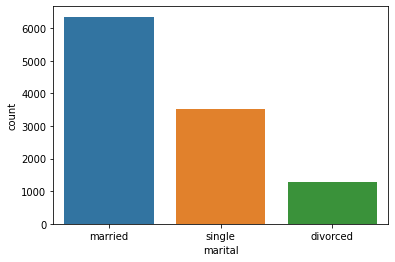

In [24]:
#count the number of customers based on marital status
sns.countplot(x ='marital', data = banking_data)

Married people account for the highest number of cutomers while divorced people are the least.

<AxesSubplot:xlabel='education', ylabel='count'>

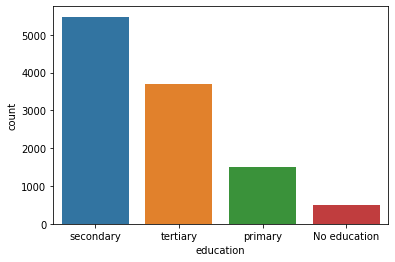

In [25]:
#count the number of customers based on education level
sns.countplot(x ='education', data = banking_data)

The bank's highest customers have attained secondary education while the least have no education

<AxesSubplot:xlabel='housing', ylabel='count'>

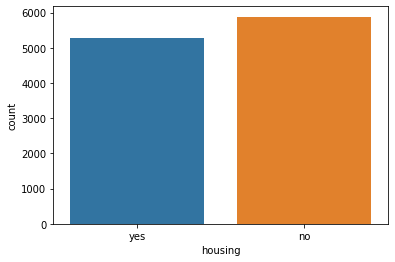

In [26]:
#chck whether customers have housing loans
sns.countplot(x ='housing', data = banking_data)

The plot shows that majority of customers have no housing loans.

<AxesSubplot:xlabel='loan', ylabel='count'>

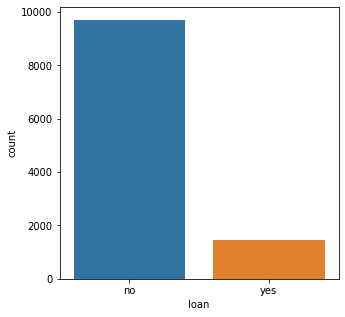

In [27]:
#check if customers have existing personal loans
plt.figure (figsize = [5,5])       
sns.countplot(x ='loan', data = banking_data)

Majority of the customers have no personal loans

<AxesSubplot:xlabel='deposit', ylabel='count'>

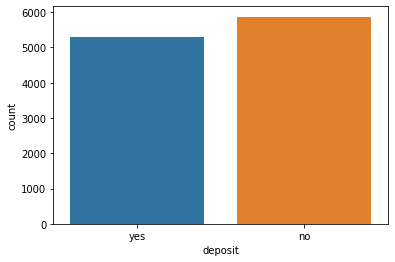

In [28]:
#check if customers will agree to make deposits
sns.countplot(x ='deposit', data = banking_data)

Majority of customers would not agree to make deposits in the bank

<AxesSubplot:xlabel='contact', ylabel='count'>

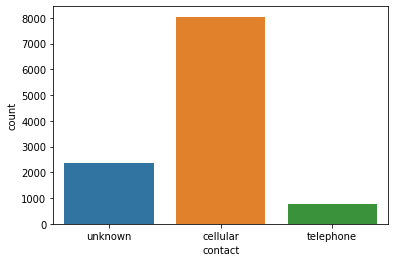

In [29]:
#check the mode of contact used when reaching customers
sns.countplot(x = 'contact', data=banking_data)

Most customers are reached via cellular mobile as compared to telephone.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

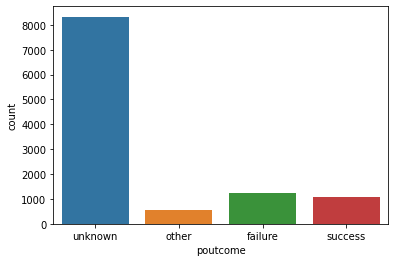

In [30]:
#check the outcome of phonecalls made to customers
sns.countplot(x = 'poutcome', data=banking_data)

Unknown accounts for the highest outcome while other accounts for the least outcome. The 'unknown' and 'other' values pose a problem of bias hence inccurate insights.

However, the bank had a lot of failure in its campaign to drive deposits.

<AxesSubplot:xlabel='marital'>

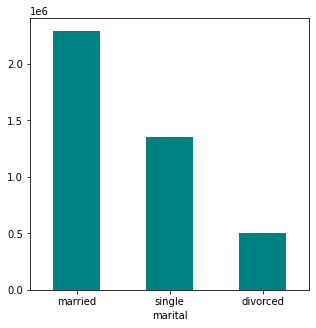

In [31]:
#analysis of marital status and education
banking_data[['marital','duration']].groupby('marital').sum().sort_values(by='duration', ascending=False).plot(kind='bar', figsize=(5,5), legend=None, color='teal',rot=0)

The bank has taken the most time to contact married customers as compared to divorced customers.

<AxesSubplot:xlabel='education'>

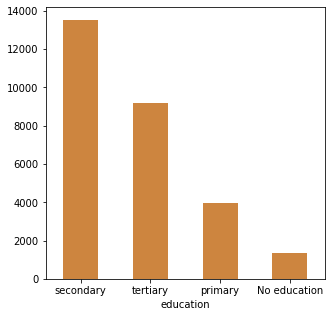

In [32]:
#check the total number of campaigns per education level
banking_data[['education','campaign']].groupby('education').sum().sort_values(by='campaign', ascending=False).plot(kind='bar', figsize=(5,5), legend=None, color='peru',rot=0)

The plot shows that people with no education were more likely to accept the campaigns as compared to those wih secondary education

<AxesSubplot:xlabel='education', ylabel='count'>

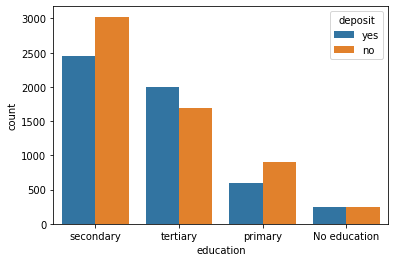

In [33]:
#check the customers that are most likely to deposit with the bank based on education level
sns.countplot(x="education", hue="deposit", data=banking_data)

The plot shows that people with tertiary education are more likely to deposit ith the company as compared to those with secondary and primary education.  

<AxesSubplot:xlabel='marital', ylabel='count'>

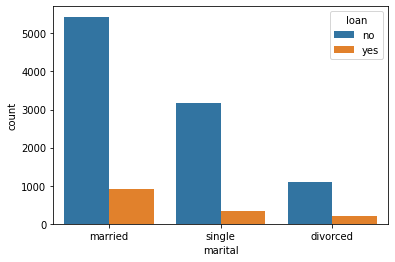

In [34]:
#check the customers wit personal loans based on marital status
sns.countplot(x="marital", hue="loan", data=banking_data)

The plot shows that people of all marital status do not have personal loans



Text(0.5, 1.0, 'Loan defaulters based on Marital status')

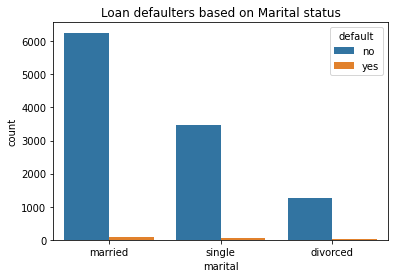

In [35]:
#check for loan defaulters based on marital status
sns.countplot(x="marital", hue="default", data=banking_data)
plt.title('Loan defaulters based on Marital status')

Married people account for the largest group of loan non-defaulters in the bank while divorced people account for the least group of loan non-defaulters.

Text(0.5, 1.0, 'Loan defaulters based on Education')

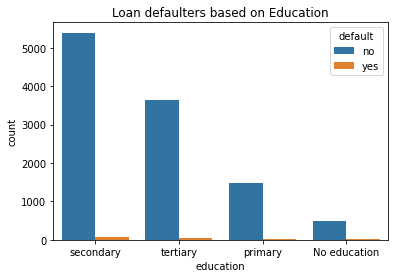

In [36]:
#loan defaulters based on education
sns.countplot(x="education", hue="default", data=banking_data)
plt.title('Loan defaulters based on Education')

People with secondary education make up the largest group of loan non-defaulters.

<AxesSubplot:xlabel='job', ylabel='count'>

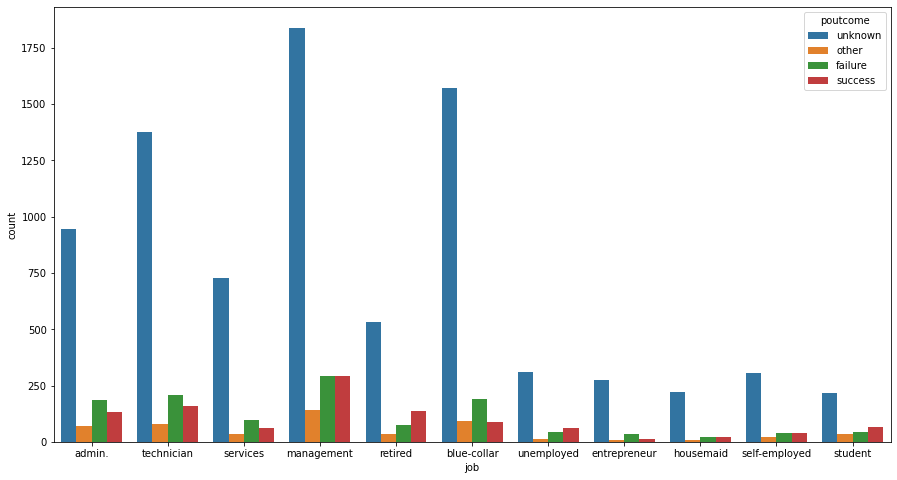

In [37]:
#check for phone outcomes based on job of customer
plt.figure(figsize=(15,8))
sns.countplot(x="job", hue="poutcome", data=banking_data)

The plot shows that the most common outcome for customers in all jobs is unknown with those in management taking up the highest proportion. 

<AxesSubplot:xlabel='job', ylabel='count'>

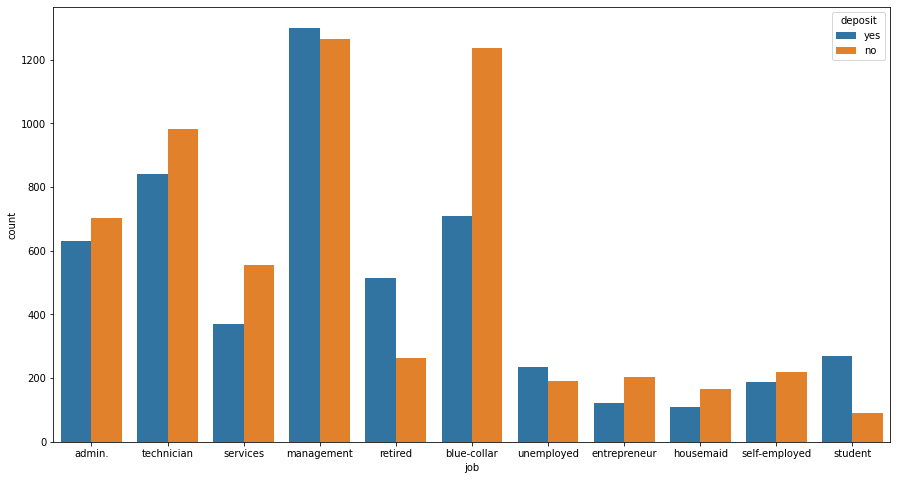

In [38]:
#check customers job most likely to deposit with the bank
plt.figure(figsize=(15,8))
sns.countplot(x="job", hue="deposit", data=banking_data)

The people in management are more likely to accept to deposit with the bnk as compared to housemaids. 
Also, people in blue-collar jobs had the highest number of people refusing to deposit with the bank.

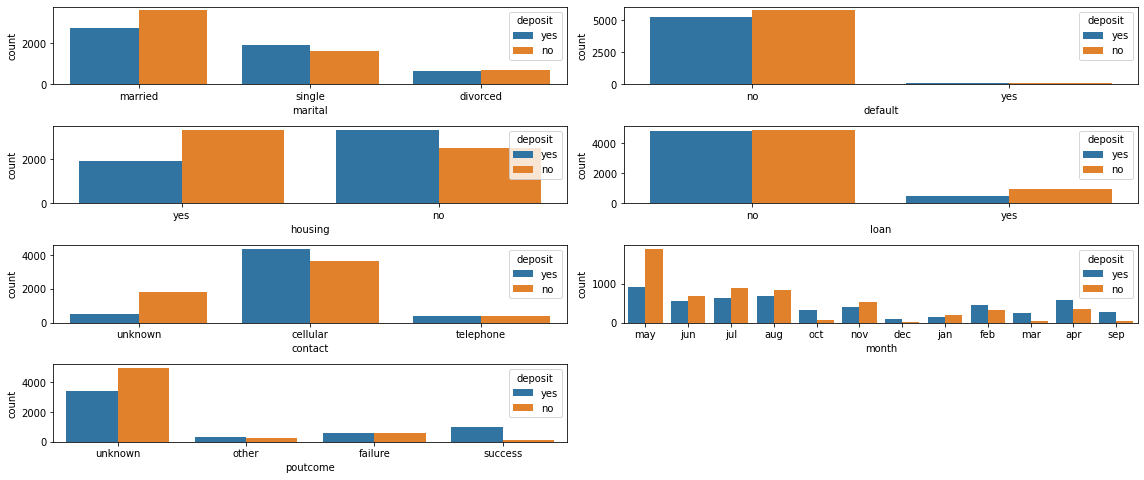

In [39]:

col_cat=['marital','default','housing','loan','contact','month','poutcome']
banking_data[col_cat]
plt.figure(figsize=(16,8))
for i,features in enumerate(banking_data[col_cat]):
    plt.subplot(5,2,i+1)
    sns.countplot(x=features,hue='deposit',data=banking_data)
plt.tight_layout() 
plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

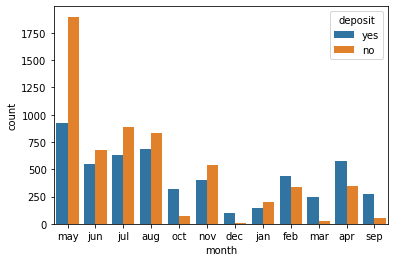

In [47]:
#check for the month when customers are likely to deposit in their accounts
sns.countplot(x="month", hue="deposit", data=banking_data)

Compared to every other month, more customers agreed that they would deposit in April since majority said 'yes' as compared to those that said 'no'. 


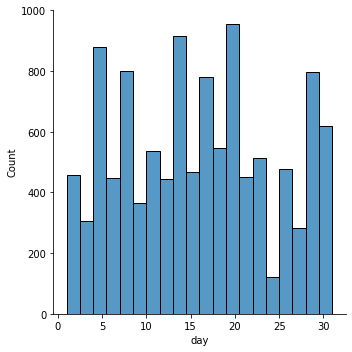

In [42]:
sns.displot(banking_data, x="day", bins=20)
plt.show()

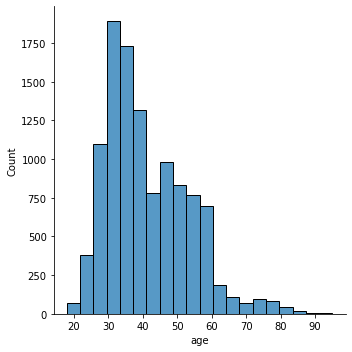

In [43]:
#check for distribution of age
sns.displot(banking_data, x="age", bins=20)
plt.show()

Majority of the bank's customers are between 30-40 years old while the oldest range between 60-95 years old.

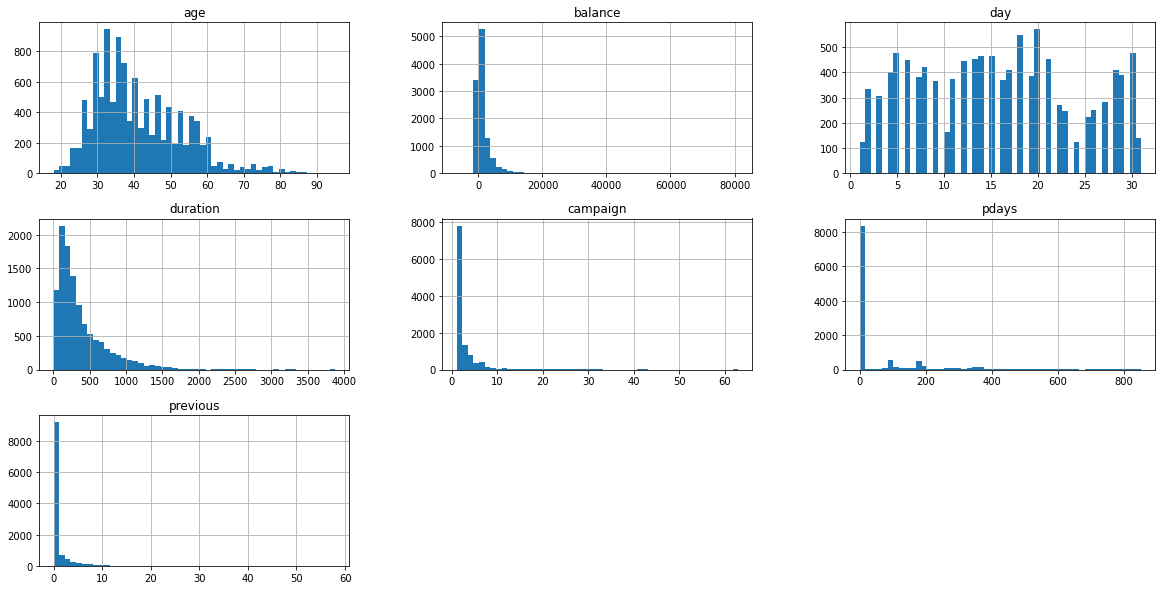

In [44]:
#check distribution of numerical columns
banking_data.hist(bins=50, figsize=(20,10))
plt.show()

The histograms are skewed to the right since the peak of the graphs are in the left side of the centre of the graphs. It can also be said to be a positively skewed histogram


#INSIGHTS



1.   Married people account for the highest number of cutomers while divorced people are the least.
2.  The bank's highest customers have attained secondary education while the least have no education
3. Majority of the customers have neither housing loans nor personal loans
4. Non-bank defaulters make up the largest proportion of the bank's customers
5. The people in management are more likely to accept to deposit with the bank as compared to housemaids. Also, people in blue-collar jobs had the highest number of people refusing to deposit with the bank.
5. People with secondary education make up the largest group of loan non-defaulters.
6.  Customers with tertiary education are more likely to deposit with the company as compared to those with secondary and primary education.
7. Majority of the bank's customers are between 30-40 years old while the oldest range between 60-95 years old.



